In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

import gudhi

import sys
sys.path.append('..')

from topomap import TopoMap

In [2]:
def plot_data_projection_plotly(df, proj, proj_original):

    fig = make_subplots(rows=1, cols=3,
                        specs=[[{'type': 'scene'}, 
                                {'type': 'xy'}, 
                                {'type': 'xy'}]],
                        subplot_titles=('Original points', 
                                        'TopoMap Original Projection',
                                        'New TopoMap Projection'))

    fig.add_trace(
        go.Scatter3d(x=df['x'], y=df['y'], z=df['z'],
                     mode='markers',
                     marker=dict(size=3,
                                 color=df['ClusterId'],
                                 colorscale=px.colors.qualitative.D3),
                     ),
        row=1, col=1
    )

    fig.add_trace(
        go.Scatter(x=proj_original[:,0], 
                   y=proj_original[:,1],
                   mode='markers',
                   marker=dict(color=df['ClusterId'],
                               colorscale=px.colors.qualitative.D3),
                   ),
        row=1, col=2
    )

    fig.add_trace(
        go.Scatter(x=proj[:,0], 
                   y=proj[:,1],
                   mode='markers',
                   marker=dict(color=df['ClusterId'],
                               colorscale=px.colors.qualitative.D3),
                   ),
        row=1, col=3
    )

    fig.update_layout(showlegend=False)

    return fig

In [3]:
def plot_data_projection(df, data, proj, proj_original):
    colors = [px.colors.qualitative.D3[i] for i in range(3)]

    fig = plt.figure(figsize=(12,8))

    ax = fig.add_subplot(2, 3, 1, projection='3d')
    for cluster in df['ClusterId'].unique():
        i_cluster = list(df[df['ClusterId']==cluster].index)
        ax.scatter(data[i_cluster,0], data[i_cluster,1], data[i_cluster,2],
                c=colors[cluster], s=5)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    ax.view_init(elev=30, azim=45, roll=15)
    ax.set_title('Original points')

    ax = fig.add_subplot(2, 3, 2)
    for cluster in df['ClusterId'].unique():
        i_cluster = list(df[df['ClusterId']==cluster].index)
        ax.scatter(proj_original[i_cluster,0], proj_original[i_cluster,1],
                c=colors[cluster], s=5)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title('TopoMap Original Projection')

    ax = fig.add_subplot(2, 3, 3)
    for cluster in df['ClusterId'].unique():
        i_cluster = list(df[df['ClusterId']==cluster].index)
        ax.scatter(proj[i_cluster,0], proj[i_cluster,1],
                c=colors[cluster], s=5)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title('New TopoMap projection')

    fig.tight_layout()

    return fig

In [4]:
def plot_persistence_diagrams(st_original, st_projection):
    diag_original = st_original.persistence(min_persistence=0)
    diag_proj = st_projection.persistence(min_persistence=0)

    fig, axs = plt.subplots(1, 2, figsize=(8, 4))

    gudhi.plot_persistence_diagram(diag_original, axes=axs[0])
    axs[0].set_title('Original Points')
    gudhi.plot_persistence_diagram(diag_proj, axes=axs[1])
    axs[1].set_title('Projections')
    
    fig.suptitle('Persistence diagrams')
    fig.tight_layout()
    
    return fig

## 3 Blobs

In [5]:
df_blobs = pd.read_csv('../data/3blobs.csv')
data_blobs = df_blobs[['x','y','z']].values
proj_original_blobs = np.genfromtxt('../data/3blobs_output.csv', delimiter=',')

topomap_blobs = TopoMap()
proj_blobs = topomap_blobs.fit_transform(data_blobs)

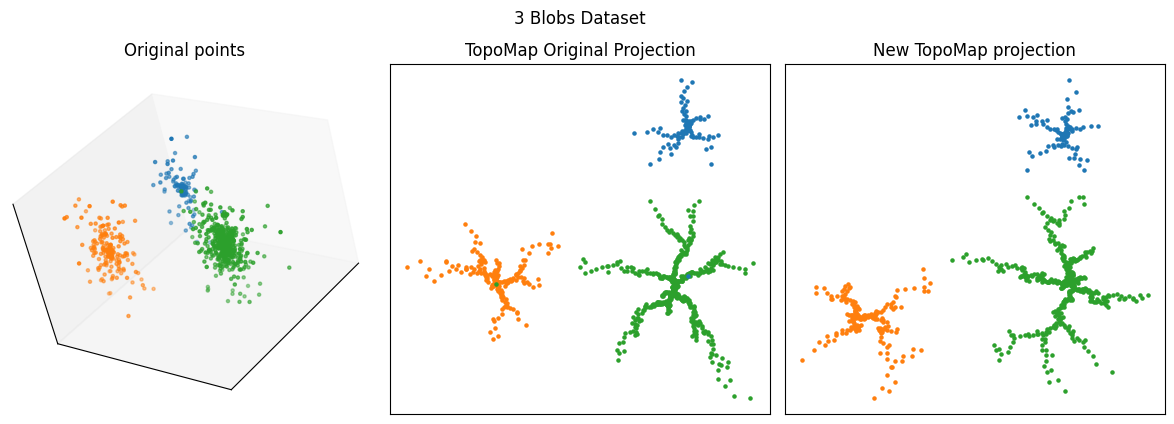

In [6]:
fig = plot_data_projection(df_blobs, data_blobs, proj_blobs, proj_original_blobs)
fig.suptitle('3 Blobs Dataset')
fig.tight_layout()

In [7]:
fig = plot_data_projection_plotly(df_blobs, proj_blobs, proj_original_blobs)
fig.update_layout(title_text='3 Blobs Dataset')
fig.show()

/home/user/.local/lib/python3.11/site-packages/gudhi/persistence_graphical_tools.py:105: UserWarning:

This function is not available.
ModuleNotFoundError: No module named 'matplotlib'.



Bottleneck distance for 3Blobs: 0.0000074030


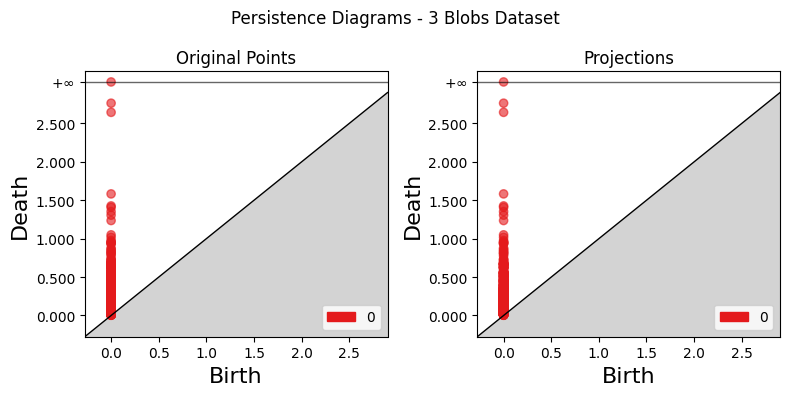

In [8]:
rips_original_blobs = gudhi.RipsComplex(points=data_blobs)
st_original_blobs = rips_original_blobs.create_simplex_tree(max_dimension=1)

rips_proj_blobs = gudhi.RipsComplex(points=proj_blobs)
st_proj_blobs = rips_proj_blobs.create_simplex_tree(max_dimension=1)

fig_persistence_blobs = plot_persistence_diagrams(st_original_blobs, st_proj_blobs)
fig_persistence_blobs.suptitle('Persistence Diagrams - 3 Blobs Dataset')

I_original = st_original_blobs.persistence_intervals_in_dimension(0)
I_proj = st_proj_blobs.persistence_intervals_in_dimension(0)

bt_blobs = gudhi.bottleneck_distance(I_original, I_proj)

print(f"Bottleneck distance for 3Blobs: {bt_blobs:.10f}")

## 3 Rings

In [9]:
df_rings = pd.read_csv('../data/3rings.csv')
data_rings = df_rings[['x','y','z']].values
proj_original_rings = np.genfromtxt('../data/3rings_output.csv', delimiter=',')

topomap_rings = TopoMap()
proj_rings = topomap_rings.fit_transform(data_rings)

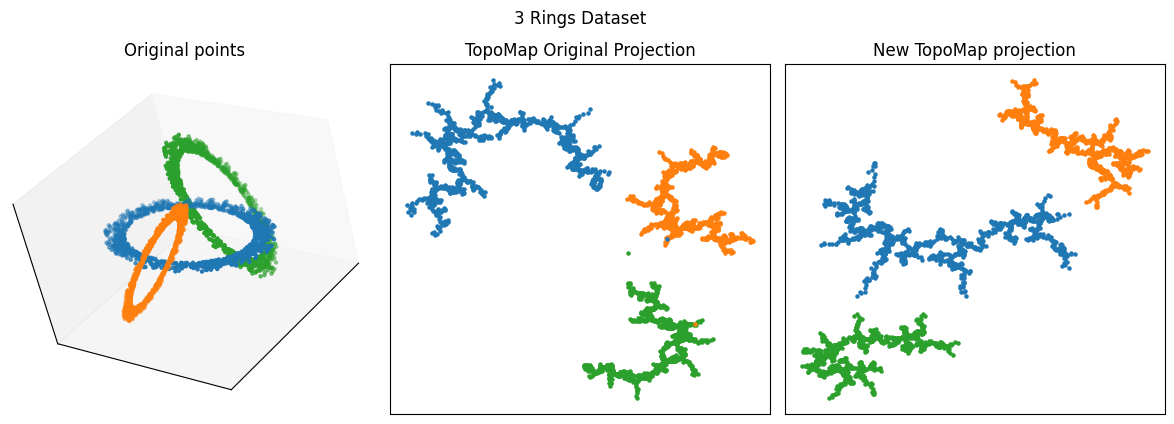

In [10]:
fig = plot_data_projection(df_rings, data_rings, proj_rings, proj_original_rings)
fig.suptitle('3 Rings Dataset')
fig.tight_layout()

In [11]:
fig = plot_data_projection_plotly(df_rings, proj_rings, proj_original_rings)
fig.update_layout(title_text='3 Rings Dataset')
fig.show()

Bottleneck distance for 3 Rings: 0.0007485276


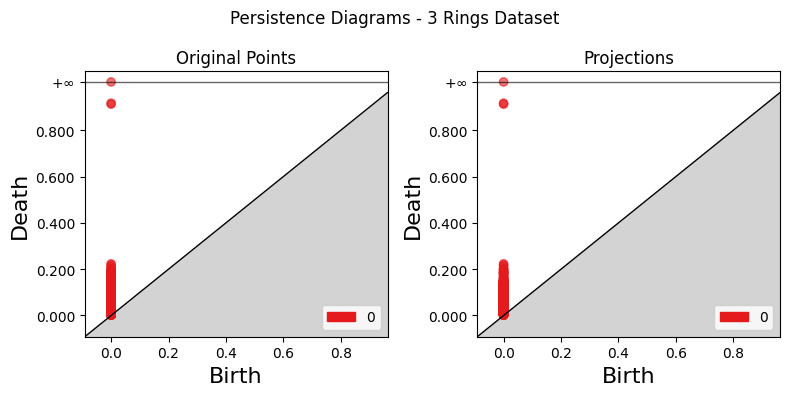

In [12]:
rips_original_rings = gudhi.RipsComplex(points=data_rings)
st_original_rings = rips_original_rings.create_simplex_tree(max_dimension=1)

rips_proj_rings = gudhi.RipsComplex(points=proj_rings)
st_proj_rings = rips_proj_rings.create_simplex_tree(max_dimension=1)

fig_persistence_rings = plot_persistence_diagrams(st_original_rings, st_proj_rings)
fig_persistence_rings.suptitle('Persistence Diagrams - 3 Rings Dataset')

I_original = st_original_rings.persistence_intervals_in_dimension(0)
I_proj = st_proj_rings.persistence_intervals_in_dimension(0)

bt_rings = gudhi.bottleneck_distance(I_original, I_proj)

print(f"Bottleneck distance for 3 Rings: {bt_rings:.10f}")

## 2 Cavities

In [13]:
df_cavities = pd.read_csv('../data/2cavities.csv')
df_cavities = df_cavities.rename(columns={'X':'x', 'Y':'y', 'Z':'z'})
data_cavities = df_cavities[['x','y','z']].values
proj_original_cavities = np.genfromtxt('../data/2cavities_output.csv', delimiter=',')

topomap_cavities = TopoMap()
proj_cavities = topomap_cavities.fit_transform(data_cavities)

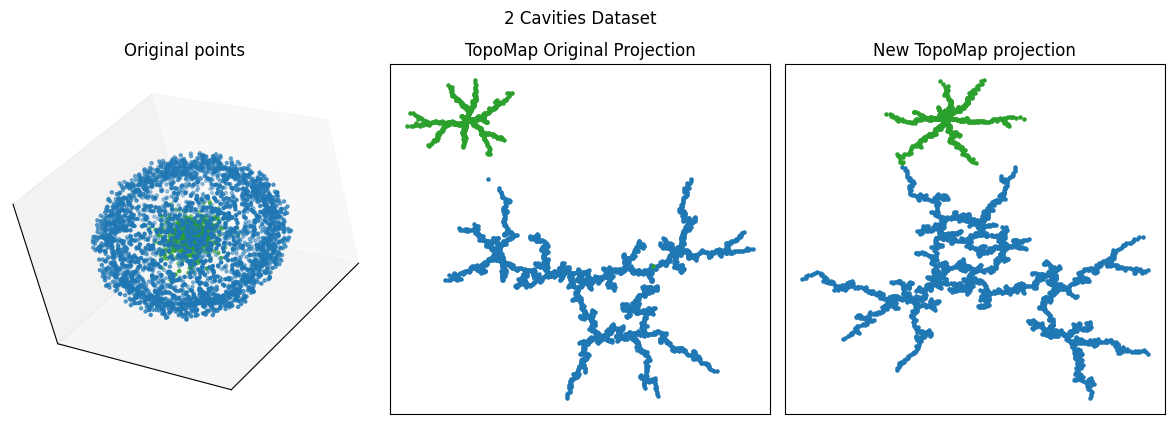

In [14]:
fig = plot_data_projection(df_cavities, data_cavities, proj_cavities, proj_original_cavities)
fig.suptitle('2 Cavities Dataset')
fig.tight_layout()

In [15]:
fig = plot_data_projection_plotly(df_cavities, proj_cavities, proj_original_cavities)
fig.update_layout(title_text='2 Cavities Dataset')
fig.show()

Bottleneck distance for 2 Cavities: 0.0003797386


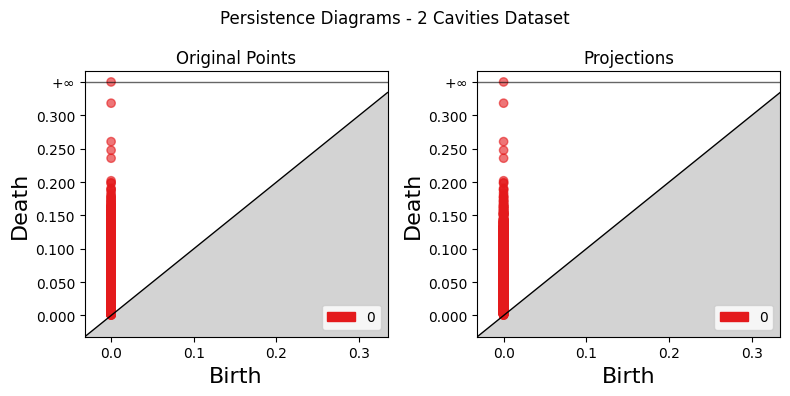

In [16]:
rips_original_cavities = gudhi.RipsComplex(points=data_cavities)
st_original_cavities = rips_original_cavities.create_simplex_tree(max_dimension=1)

rips_proj_cavities = gudhi.RipsComplex(points=proj_cavities)
st_proj_cavities = rips_proj_cavities.create_simplex_tree(max_dimension=1)

fig_persistence_cavities = plot_persistence_diagrams(st_original_cavities, st_proj_cavities)
fig_persistence_cavities.suptitle('Persistence Diagrams - 2 Cavities Dataset')

I_original = st_original_cavities.persistence_intervals_in_dimension(0)
I_proj = st_proj_cavities.persistence_intervals_in_dimension(0)

bt_cavities = gudhi.bottleneck_distance(I_original, I_proj, e=0)

print(f"Bottleneck distance for 2 Cavities: {bt_cavities:.10f}")